# 설명
numpy : 넘파이의 자료구조는 ndarray 로 이것을 통해서 vector, matrix, tensor 를 표현하려고 한다. 
matplotlib, seaborn 을 통해서 시각화를 한다.

vector : 크기와 방향을 표현,
	크기를 표현하기 위해서 norm (피타고라스 정리로 구한다 )
	방향은 내적으로 구한다.  (내적이 상관계수와 같다) 



이 시각화기능이 pandas 에도 들어있다. (plot)
pandas = ndarray + dict  


(dict 의 단점 : 중복 허용 x, 순서보장 x ) -> 그래서 만든게 pandas (중복허용, 순서보장, 고속으로 데이터 처리 ) 
pandas 는 1차원 series, 2차원 dataframe , 3차원 : panel 을 표현하고자 한다. 

numpy 인덱싱 할 땐 숫자에 의해서 였지만 판다스에서는 key 에 의한 indexing 도 가능하다.
판다스는 인덱싱이 발달되었다.  (loc함수로 키를, iloc 함수로 숫자 인덱싱을 통해 데이터 검색하고 찾을 수 있다. )
행 인덱스 : index/ 열 인덱스 : colunms  / 값 : values


판다스 : 전처리에 사용된다.  데이터 획득했다 하면 무조건 판다스 이용하자!!

          전처리 : 1.결측치 처리 (is.na 등을 통해서 결측치 처리를 한다 )
          	        2.이상치 처리 ( pandas 는 plot 함수를 통해 시각화를 지원하는데 plot 아래에 box 함수도 있다 )
		3.범주화 (catagorical 함수를 이용한다 ) 
		4.정규화 ( hyperparameter )  : min-max 정규화 , Z 점수 정규화  ( Z = (data-평균)/ 표준편차 ),robust 정규화, normalization
			Z 점수 정규화는 범위가 넓어서 이상치가 나올 수 있다. -> robust 정규화 ( 3사분위수, 1사분위수를 이용 )
			방향값이 중요한 데이터는 normalization 을 한다
		5.시각화

범주화는 scikits , 정규화도 scikits 에 하는 것이 더 유리하다. 



상관계수 낮으면 회귀분석 안하는것이 좋다.





In [ ]:
# 미분
# 분산 : (sigma(관측치-평균)^2) / n-1 
# 표준편차 : root((sigma(관측치-평균)^2) / n-1 )
# 공분산 : sigma ((x - xbar)(y-ybar)) / n-1
# 상관계수 : sigma ((x - xbar)(y-ybar)) / n-1)   /  (xsigma * ysigma)  : -1 과 1 사이의 수 이다. 
# 거리값 : 각요소의 차의 제곱을 루트로 구함

# model 평가 : MSE ( mean square error ) : 연속된 수치인 경우의 평가 
#            RMSE ( root )
# 신경망에서 cost function 비용함수 : (예측치 - 관측치) => back propagation (역전파를 통해서 가중치를 수정해준다. )

# 국어, 수학 점수 vector  의 상관계수가 높으면 ? 국어 점수가 높으면 수학 점수도 높을 것이다. 
# 내적이 1이다 = 상관계수가 높다  ( 같은 것이므로 구하기 쉬운 내적을 많이 쓴다 ) 



In [1]:
# 회귀분석, 상관분석
#  Q. 회귀분석에서 다중공선성이 있으면??  x끼리 연관성이 높으면 종속변수가 과하게 영향을 받을 수 있다.
#  Q. 회귀분석에서 자기상관성 (Autocorelation) 이 존재한다면 ?  시계열분석

# 시계열분석
#   기초 : ARMA  (Autocorelation + Moving Average )  
#       - moving average : 이동평균법  (이동평균법을 하는 이유는 주파수를 줄여주기 위해서다. 복잡하면 분석이 불가능)
#       - 정상성을 띈데이터에만 가능
#    
#    비정상성을 정상성을 바꿔서 처리한다.
#
#         ARIMA ( 비정상을 띈 데이터에도 가능한 모델이다 ) 

# pandas 는 시계열 분석을 지원한다. (시계열 분석을 할 수 있도록 시간 index 를 지원한다 )

In [4]:
import numpy as np
from statistics import *
x=np.array([7,8,9])
y=np.array([9,10,20])
print(y.mean()) # 통계에서는 중위수 (medians) 많이 사용한다. (중위수는 이상치의 영향을 받지않기 때문) 

# 공분산행렬
print("공분산",np.cov(x,y))

# 상관계수행렬 (0.904 --> 상관관계가 높다)
print("상관계수",np.corrcoef(x,y))



13.0
공분산 [[ 1.   5.5]
 [ 5.5 37. ]]
상관계수 [[1.         0.90419443]
 [0.90419443 1.        ]]


In [7]:
import numpy as np
arr = np.array([[1,2,3],[4,5,6],[7,8,9]])
print("원본", arr)
print("누적합(행)=",arr.cumsum(0))
print("누적곱(열)=",arr.cumprod(1))
print("배열의 합계=",arr.sum())
print("열방향으로 합계(행평균) = ", arr.mean(axis=1))  # axis=1 로 쓰면 열방향으로 구해진다.  -> 행방향과 열방향의 구분문자
print("행방향으로의 합계=", arr.sum(0))  # 0을 주면 행방향으로 구해진다 -> 열별합계

원본 [[1 2 3]
 [4 5 6]
 [7 8 9]]
누적합(행)= [[ 1  2  3]
 [ 5  7  9]
 [12 15 18]]
누적곱(열)= [[  1   2   6]
 [  4  20 120]
 [  7  56 504]]
배열의 합계= 45
열방향으로 합계(행평균) =  [2. 5. 8.]
행방향으로의 합계= [12 15 18]


In [11]:
# 분석하다보면 임의적으로 가중치를 부여하는 경우가 있다. (가중치를 부여한다 = 변수중요도를 부여한다)
# 가중치를 부여한다는 의미 
a = np.array([1,2,3,4])     # 여기서 1이 중요하다고 생각해서 가중치 4를 주었다
wts = np.array([4,3,2,1])   # 1에는 4의 중요성을 주고 2에는 3의 중요성 4에는 1의 중요성을 줬다 ( 가중치를 부여함 = 수의 중요성을 부여)
print(np.average(a,weights = wts))  

std = np.sqrt(np.mean(abs(a-a.mean())**2))
print(np.var([1,2,3,4]))  # 분산
print(np.std([1,2,3,4]))  # 표준편차


2.0
1.25
1.118033988749895
1.2499240000000003


In [ ]:
# 시각화 : matplotlib, seaborn, pandas.plot  등이 있는데 matplotlib 가 기본이다.
#  - matplotlib 로 구성
#  - %matplotlib inline 을 사용해야 출력

data1 : mean= 100.776 stdv=19.620
data2 : mean= 151.050 stdv=22.358


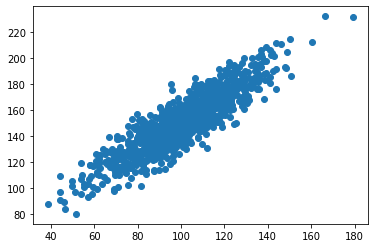

In [14]:
%matplotlib inline
from numpy import mean  
# from import 이런식으로 표현하면 numpy 의 mean 함수만 로딩한다 ( 다불러오면 메모리 낭비인데 from 쓰면서 메모리낭비줄인다)
from numpy import std
from numpy.random import randn  
# numpy 에는 randn 이라는 서브 패키지가 있다. (linalg, random, fft(푸리에변환), poly(다차방정식) 과 같은 서브패키지가 있다) 
from numpy.random import seed 
#seed 값을 주는 이유 ? random 은 컴퓨터에서 의사난수이다 ( 데이터 출력순서가 정해져있다 ) 
# seed 는 시작점을 고정 -> 항상 같은 수가 나온다. 
from matplotlib import pyplot  #matplotlib 의 pyplot 이란 패키지가 있다. 
seed(1)  # 같은수가 발생
data1 = 20* randn(1000) + 100  # randn (1000) : 정규분포에서 1000개를 발생시켜라 
data2 = data1 + (10 * randn(1000) +50)
print('data1 : mean= %.3f stdv=%.3f' % (mean(data1),std(data1)))
print('data2 : mean= %.3f stdv=%.3f' % (mean(data2),std(data2)))
pyplot.scatter(data1,data2)  # 산포도가 나온다.
pyplot.show()  # 산포도 그려놓고 show 를 해줘야 호출이 된다. 

In [15]:
import matplotlib.pyplot as plt
print(plt.style.available)  # 스타일을 줄 수 있다

['bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark-palette', 'seaborn-dark', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'seaborn', 'Solarize_Light2', 'tableau-colorblind10', '_classic_test']


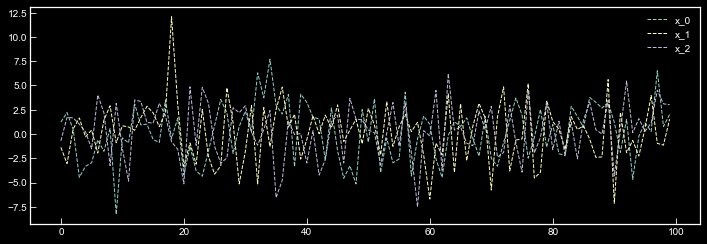

In [38]:
plt.style.use(['dark_background']) # 배경 검정색
xs = np.random.normal(0,3,(100,3)) # 평균이 0, 표준편차가 3인 100x3 을 생성한다.
 # randn  은 0~1사이의 값
 # normal 을 0과 3 같이 지정해줄수 있다.

plt.figure(figsize = (12,4))  # figure -> 모양을 결정 -> size 를 12,4 로 하겠다.
for i in range(0,3):
    x = xs[:,i]  
    plt.plot(range(0,len(x)),x,linewidth =1,linestyle='--', label='x_{}'.format(i))
      # 한개씩 불러와서 한개씩 그려준다.  
plt.legend() # 범례
plt.grid(False) #plt.grid(Ture) 해봐라 # 격자선 
plt.show()

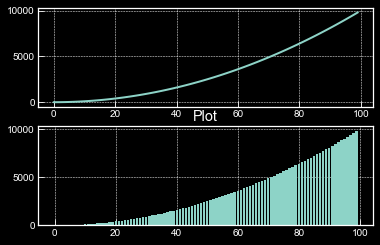

In [41]:
# 화면을 분할해보자
fig = plt.figure()
ax1= fig.add_subplot(2,1,1)  # 2행 1열 중에서 첫번째 가 ax1 이다.
ax2 = fig.add_subplot(2,1,2) # 2행 1열 중에서 2번째 놈으로 즉 밑에 출력된다. 
# 2개의 면을 얻었다. 

x=range(0,100)  
y=[v*v for v in x]

ax1.plot(x,y)
ax2.bar(x,y) # 막대그래프

plt.title("Plot")
plt.show()

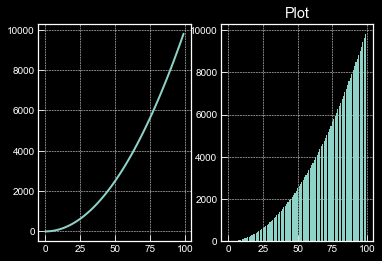

In [42]:
# 화면을 분할해보자
fig = plt.figure()
ax1= fig.add_subplot(1,2,1)  # 1행 2열 중에서 첫번째 가 ax1 이다.
ax2 = fig.add_subplot(1,2,2) # 1행 2열 중에서 2번째 놈으로 출력 
# 2개의 면을 얻었다. 

x=range(0,100)  
y=[v*v for v in x]

ax1.plot(x,y)
ax2.bar(x,y) # 막대그래프

plt.title("Plot")
plt.show()

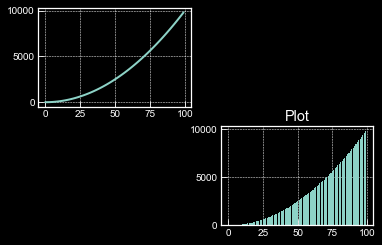

In [43]:
# 화면을 분할해보자
fig = plt.figure()
ax1= fig.add_subplot(2,2,1)  
ax2 = fig.add_subplot(2,2,4)  
# 2개의 면을 얻었다. 

x=range(0,100)  
y=[v*v for v in x]

ax1.plot(x,y)
ax2.bar(x,y) # 막대그래프

plt.title("Plot")
plt.show()

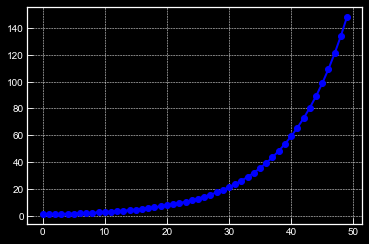

In [47]:
x1 = np.linspace(0.0, 5.0) 
x2 = np.linspace(0.0, 2.0)

plt.plot(np.exp(x1), 'yo-')  # 지수함수의 그래프
            # yo- : yellow +  point marking (점찍기 ) + linetype (실선)   
plt.show()

AxesSubplot(0.125,0.536818;0.775x0.343182)
AxesSubplot(0.125,0.125;0.775x0.343182)


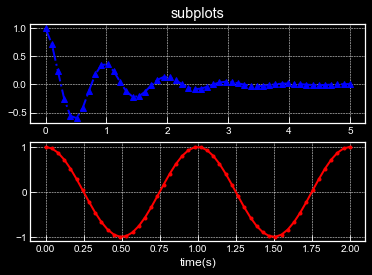

In [56]:
# 주기성이 있는 그래프를 그려보자
y1 = np.cos(2*np.pi *x1) * np.exp(-x1)  #np.exp(-1) 로 했더니 점점 줄어든다. (나중에 수렴하고 있다)
y2 = np.cos(2 *np.pi * x2)              
ax1 = plt.subplot(2,1,1)
plt.plot(x1,y1,'b^-.') #2번째에 ^ 도 되고, > 도 되고 , 숫자도되고 , p 하면 5각형  등등 다양하게 가능
                       # 3번째에 -. 도 되고 : 도 된다. 
plt.title('subplots')
print(ax1)
ax2=plt.subplot(2,1,2)
plt.plot(x2,y2,'r.-')
plt.xlabel('time(s)')
print(ax2)
plt.show()

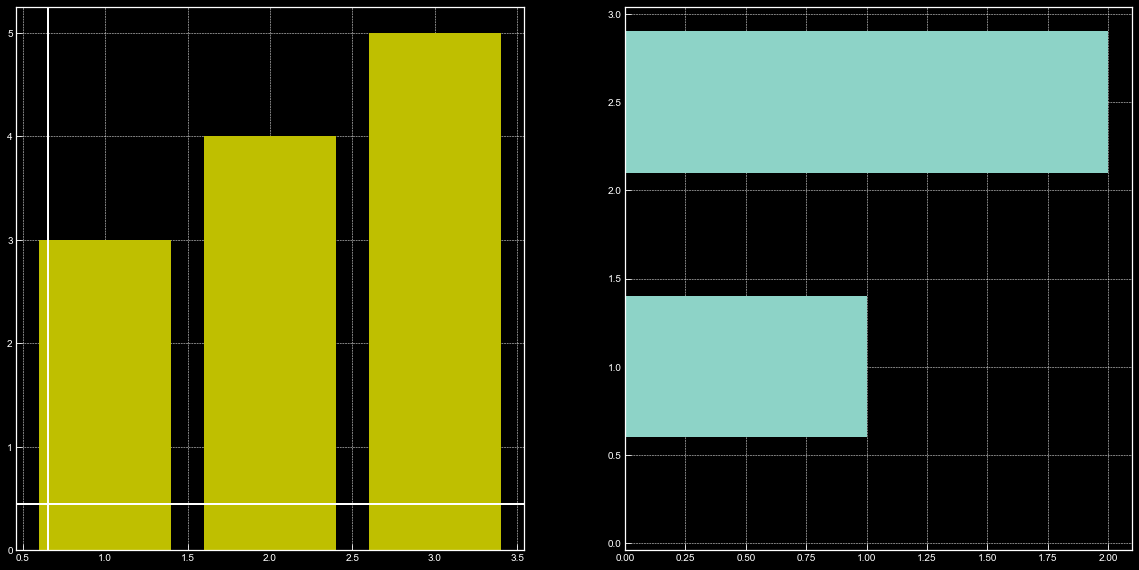

In [66]:
fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

# bar : 이산형 막대그래프
# histogram : 연속형 막대그래프

ax1.bar([1,2,3],[3,4,5],color='y')
ax2.barh([0.5,1,2.5],[0,1,2])# v는 vertical(수직으로) , h 는 horizontal (수평으로)

ax1.axvline(0.65)
ax1.axhline(0.45)

plt.tight_layout() # 여백을 줄여서 표현
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x18342f22ac8>,
 'caps': [<matplotlib.lines.Line2D at 0x18342f03908>,
 'boxes': [<matplotlib.lines.Line2D at 0x18342f222c8>],
 'medians': [<matplotlib.lines.Line2D at 0x18342f03fc8>],
 'fliers': [<matplotlib.lines.Line2D at 0x18342f1ff08>],
 'means': []}

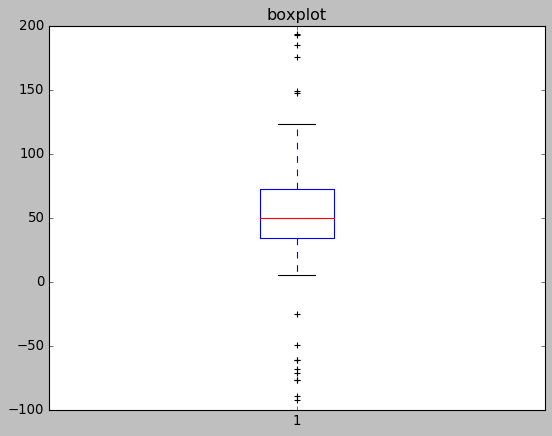

In [70]:
#boxplot 
# 처음에 IQR (inter quantile range = 3 사분위수 - 1사분위수 )  을 구한다.
# IQR *  플러스마이너스 1.5  하면 상사한선이다. 
plt.style.use(['classic'])
np.random.seed(19680801)
spread = np.random.rand(50) * 100 # 분포데이터다
center = np.ones(25) * 50  # 중심데이터를 만들었다. 
flier_high = np.random.rand(10) * 100 + 100  #상한선을 넘는 데이터
flier_low = np.random.rand(10) * -100 # 하한선을 넘는 데이터
data = np.concatenate((spread,center,flier_high,flier_low)) # concatenate 를 통해 데이터 병합
fig1, ax1 = plt.subplots()  # subplot 하면 형태를 제어, 도화지를 리턴한다. ax1 이 도화지이다. 
#fig1 는 모양을 제어 (모양을 제어할 일이 아직 없어서 도화지를 그림)
ax1.set_title('boxplot')
ax1.boxplot(data)

{'whiskers': [<matplotlib.lines.Line2D at 0x1834368b908>,
 'caps': [<matplotlib.lines.Line2D at 0x183431f3ac8>,
 'boxes': [<matplotlib.lines.Line2D at 0x18343696d88>],
 'medians': [<matplotlib.lines.Line2D at 0x18343202bc8>],
 'fliers': [<matplotlib.lines.Line2D at 0x18343202d08>],
 'means': []}

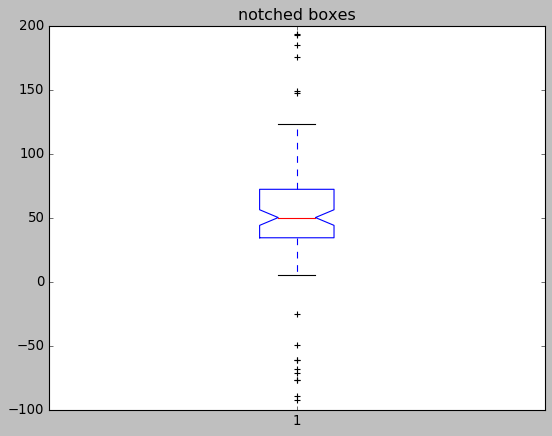

In [71]:
fig2, ax2 =plt.subplots()
ax2.set_title("notched boxes")  # 홈이 95% 신뢰구간 
ax2.boxplot(data,notch =True)

# 홈이 파진다. notch 를 통해 파지는 것이다. 

{'whiskers': [<matplotlib.lines.Line2D at 0x18343252548>,
 'caps': [<matplotlib.lines.Line2D at 0x18343252f48>,
 'boxes': [<matplotlib.lines.Line2D at 0x18343230ac8>],
 'medians': [<matplotlib.lines.Line2D at 0x1834326cec8>],
 'fliers': [<matplotlib.lines.Line2D at 0x1834323dfc8>],
 'means': []}

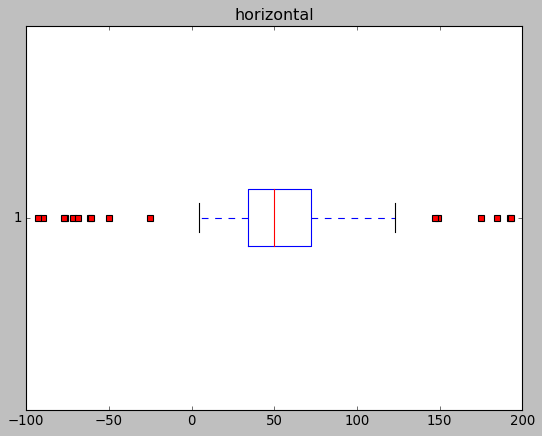

In [72]:
red_square = dict(markerfacecolor='r',marker='s')
fig5,ax5 = plt.subplots()
ax5.set_title("horizontal")
ax5.boxplot(data,vert=False,flierprops=red_square)  # flierprops 는 이상치표현을 조절하는 것이다. (빨간색 네모로 하겠다)
#vert=False : 수평으로 출력해라


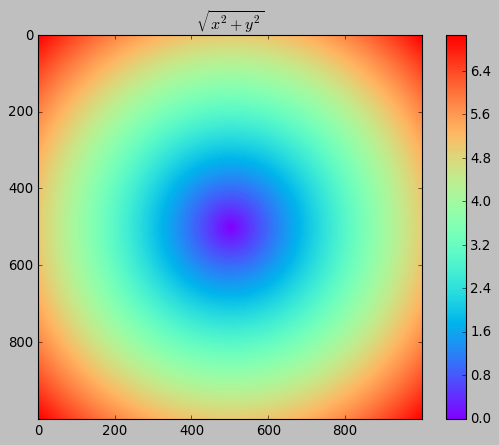

In [76]:
# meshgrid : 그물망격자
# 그래프의 수식을 출력할때는 : latex 문법을 사용한다.  ($와 $ 쓰는 것을 latex 문법 이라고 한다 ) 

points = np.arange(-5,5,0.01)  #1000개 만들어진다.
xs,ys = np.meshgrid(points, points) # 1000개 만든 것을 meshgrid 시킨다. # x축 1000개, y축 1000 개 
z= np.sqrt(xs**2 + ys**2)  #이건 중심으로부터 거리값이므로 원의 형태로 나오는 것이다. 

# 팔레트  :  
plt.imshow(z,cmap=plt.cm.rainbow);  # imshow : 데이터를 이미지로 출력해라  ( 숫자를 칼라로 표현하는것 ?  )
 # plt 밑에 cm 밑에 rainbow 가 있다. 
plt.colorbar() # 오른쪽에 나타나는 것으로 컬러별 수의 크기값을 출력 (빨간색= 길이가 6을 넘어간다 )
plt.title("$\sqrt{x^2+y^2}$")  # $ 수식 $  
plt.show()



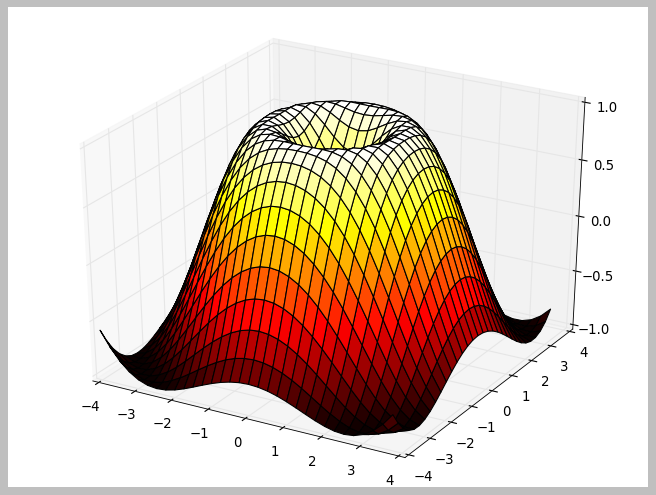

In [88]:

from mpl_toolkits.mplot3d import Axes3D  # 3차원으로 출력g할때 쓰자
fig = plt.figure() # figure 를 얻는다.
ax = Axes3D(fig) #Axes3D 에 figure 을 넣으면 3차원을 출력할 수 있는 도화지를 얻는다. 
X = np.arange(-4,4,0.25)   # 중앙이 (0,0) 이다
Y = np.arange(-4,4,0.25)
X,Y = np.meshgrid(X,Y) # 좌표를 meshgrid 아니까 좌표점으로 변한다.  -> 좌표점 : -4,-3.75, -3.5  ... (x, y 모두 이렇게 변해간다)
                                                                         # 2개씩 짝을 지으니 좌표점 만들어짐.
R = np.sqrt(X**2 + Y**2)  # 거리값
Z = np.sin(R)   # 좌표가 올라가면서 커지니까 아래와 같은 모양ㅇ이 나온다.
# Z=R   # Z=R 에서 sin 을 취한다.
ax.plot_surface(X,Y,Z, rstride=1,cstride=1,cmap='hot')
plt.show()
ax.plot_surface(X,Y,Z,rstride=1, cstride=1,cmap=plt.cm.rainbow #cmap 은 color맵이다. rstride = row 1씩 / cstride = column 1씩
plt.show()

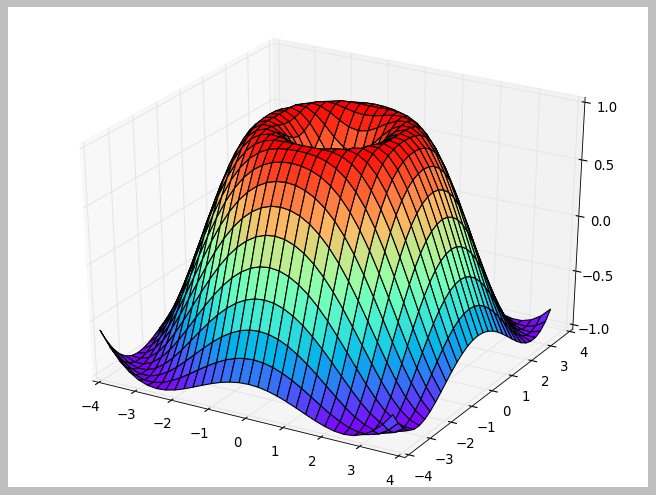

In [84]:

from mpl_toolkits.mplot3d import Axes3D  # 3차원으로 출력g할때 쓰자
fig = plt.figure() # figure 를 얻는다.
ax = Axes3D(fig) #Axes3D 에 figure 을 넣으면 3차원을 출력할 수 있는 도화지를 얻는다. 
X = np.arange(-4,4,0.25)   # 중앙이 (0,0) 이다
Y = np.arange(-4,4,0.25)
X,Y = np.meshgrid(X,Y) # 좌표를 meshgrid 아니까 좌표점으로 변한다.  -> 좌표점 : -4,-3.75, -3.5  ... (x, y 모두 이렇게 변해간다)
                                                                         # 2개씩 짝을 지으니 좌표점 만들어짐.
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)
ax.plot_surface(X,Y,Z,rstride=1, cstride=1,cmap=plt.cm.rainbow)
plt.show()

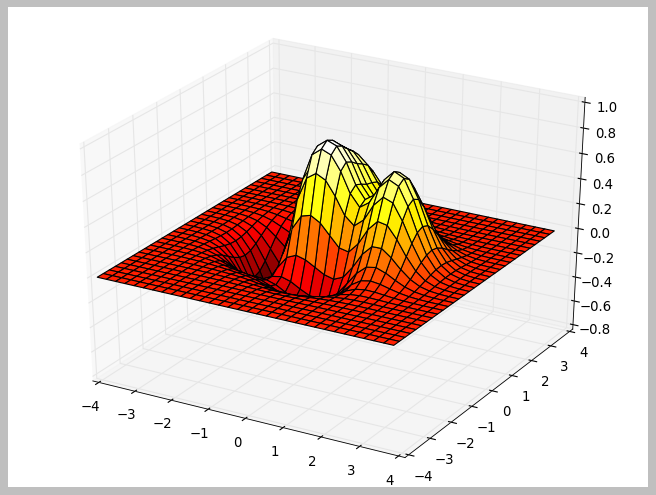

In [94]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
# 방정식
def  f(x,y): return (1-x/2+x**5+y**3)*np.exp(-x**2-y**2)
fig=plt.figure()
ax = Axes3D(fig)
X = np.arange(-4,4,0.25)
Y = np.arange(-4,4,0.25)
X,Y = np.meshgrid(X,Y)

Z=np.sin(f(X,Y))
#row, columnm
ax.plot_surface(X,Y,Z,rstride=1,cstride=1,cmap='hot')
plt.show()

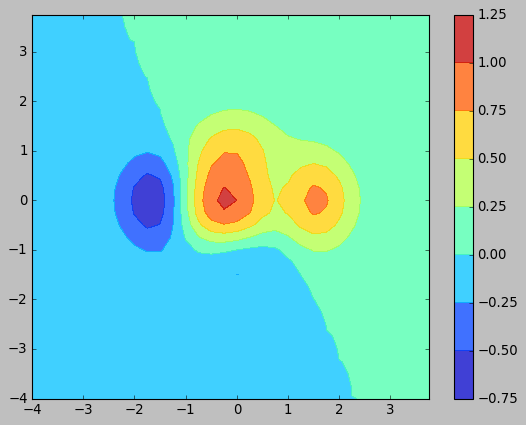

In [95]:
# 등고선 그래프 
plt.contourf(X,Y,f(X,Y), 8, alpha=.75, cmap='jet')
plt.colorbar()
plt.show()

[0 0 1 0 1 0 1 0 1 1 1 1 0 0 1 0]


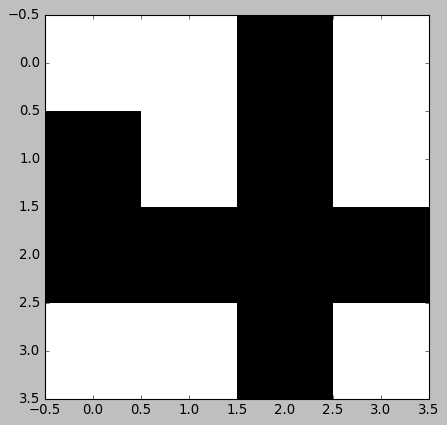

In [98]:
a = [0,0,1,0,
    1,0,1,0,
    1,1,1,1,
    0,0,1,0]
np1 = np.array(a)
print(np1)         
plt.imshow(np1.reshape(4,4), cmap='Greys',interpolation='nearest')  #4x4 에서 1인 곳만 검은색으로 색칠한다. 
plt.show() #interpolation : 보간법 =-> 보간법이 필요한 이유는? 컬러값이 지정이 되지 않으면 보간해서 적용하라는 뜻이다. 
                 # 예를 들어서 Red Blue 가 색칠해있는 것들이 있는데 색칠이 안되어있으면 그 중간값ㅇ르 넣어주라는 그런 것
    
    

In [ ]:
# 구글 : 나눔글꼴 검색 -> 나눔글꼴 모음 설치하기

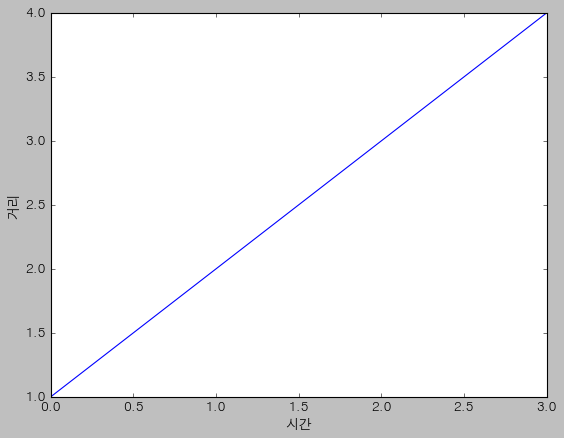

In [102]:
%matplotlib inline
from matplotlib import font_manager,rc
import matplotlib
import matplotlib.pyplot as plt
plt.style.use(['classic'])
font_path = "C:/Windows/Fonts/H2GTRM.TTF" #윈도우의 모든 폰트가 위치하는 곳이다. 
font_name = font_manager.FontProperties(fname=font_path).get_name()  #  폰트이름 획득

# font_manager -> 글꼴을 다루는 것   # fontproperties (fname ) 하면서 글자이름으로 접근하게 해주는 것. get_name() 은 이름가져오는 것

#rc 는 resource configuration  -> font 이름을 family 로 한다. 

matplotlib.rc('font',family=font_name)
plt.plot([1,2,3,4])
plt.xlabel("시간")
plt.ylabel("거리")
plt.show()

[ -47   21   50  125  193  205  130  101   92   31   82   40  -11  -34
  -98  -88 -178 -133 -219 -286 -290 -378 -303 -390 -327 -272 -252 -325
 -288 -306 -386 -290 -281 -311 -322 -254 -223 -242 -266 -295 -345 -415
 -450 -512 -586 -498 -548 -480 -536 -492]


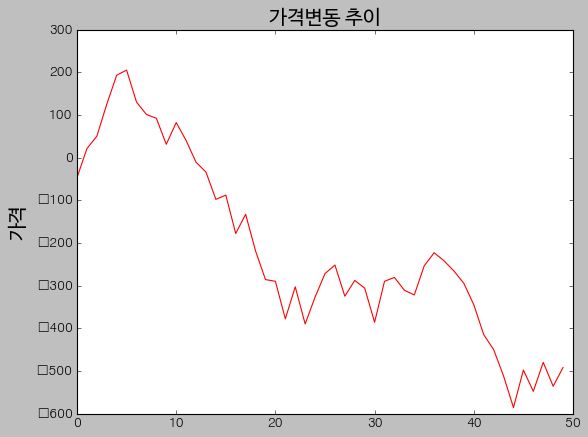

In [108]:
import matplotlib.font_manager as fm
path = 'C:\\Windows\\Fonts\\NanumBarunGothic.ttf'
fontprop = fm.FontProperties(fname=path,size=18)
data=np.random.randint(-100,100,50).cumsum()  # cumsum : 누적합계   --> # 올라갔다내려갔다 한다.  

data  
print(data)

plt.plot(range(50),data,'r')
plt.title("가격변동 추이", fontproperties=fontprop)
plt.ylabel("가격",fontproperties=fontprop)  # 따로 따로 글꼴을 지정할 수 있다. (?)
plt.show()

Text(0, 0.5, 'f(x)')

findfont: Font family ['바탕'] not found. Falling back to DejaVu Sans.
findfont: Font family ['바탕'] not found. Falling back to DejaVu Sans.


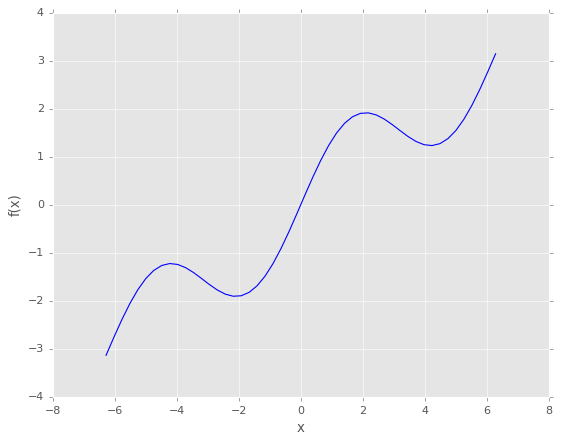

In [109]:
from pylab import plt
plt.style.use('ggplot')
import matplotlib as mpl
mpl.rcParams['font.family'] = '바탕'
def f(x):
    return np.sin(x) + 0.5 * x  # 싸인함수와 x 로 이루어진 함수이다. 싸인함수는 주기함수이다. (우상향하는 꼴) 

x=np.linspace(-2 * np.pi, 2*np.pi, 50)
plt.plot(x,f(x),'b')
plt.grid(True)
plt.xlabel('x')
plt.ylabel('f(x)')

Text(0, 0.5, 'f(x)')

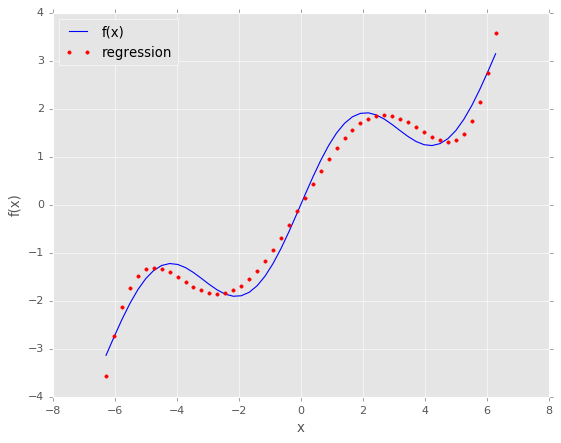

In [111]:
#최소제곱법을 이용해서 fitting해보자. (적합해본다)
#polyfit : 다차방정식으로 fitting ( 적합 ) 하면서 계수를 찾아낸다. 
reg = np.polyfit(x,f(x),deg=5) # 5차 방정식으로 피팅해라. 
ry = np.polyval(reg,x)   # reg 를 통해서 5차 방정식으로 회귀가 됐다.

plt.plot(x,f(x),'b',label='f(x)')  # 원본데이터다. 
plt.plot(x,ry,'r.',label='regression') ## 최소제곱법으로 피팅 
plt.legend(loc=0) 
plt.grid(True)
plt.xlabel('x')
plt.ylabel('f(x)')

# 원래데이터가 파란색인데 피팅해서 찾아낸것이 빨간색 (싸이파이에서 할 것 , 이런함수가 넘파이에 있다 ) 


Text(0, 0.5, 'f(x)')

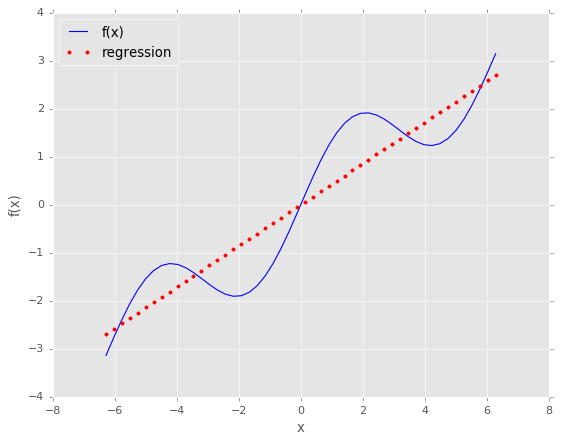

In [112]:
reg = np.polyfit(x,f(x),deg=2) # 2차 방정식으로 피팅해라.  --> 2차 방정식으로는 피팅이 안된다. 

ry = np.polyval(reg,x)   

plt.plot(x,f(x),'b',label='f(x)')  #  
plt.plot(x,ry,'r.',label='regression') 
plt.legend(loc=0) 
plt.grid(True)
plt.xlabel('x')
plt.ylabel('f(x)')


# 피팅이 아무렇게나 다 되는 것이 아니다. 규칙이 있어야 피팅이 되는 것이다. 
# 다차방정식의 복잡한 계수를 찾는 것이 딥러닝

In [ ]:
#anaconda prompt 열고
#pip install folium 먼저 해주자

In [124]:
# 지리정보시스템
import folium
map_1 = folium.Map(location=[37.565711, 126.978090], zoom_start = 16,#location : 위 , 경도 좌표 (구글에 검색하기) 
                  tiles = 'Stamen Terrain') # zoom_start : 얼마나 확대할건가.  # tiles 는 어떻게 지도 나오는지 옵션임(지워봐라)

folium.Marker([37.565711, 126.978090], popup='서울시청').add_to(map_1)  # 파란색 마커 클릭해보기 -> 글자뜬다. 
folium.Marker([37.565711, 126.978190], popup ='서울시청및', icon=folium.Icon(icon='cloud')).add_to(map_1) # 마커지정
map_1

In [ ]:
# 숙제 : 서울소재 10개대학의 좌표를 출력해봐라 

In [144]:
name = ['서울대학교','한양대학교','성균관대학교','서강대학교','연세대학교','고려대학교',
        '중앙대학교','이화여자대학교','경희대학교','숙명여자대학교']
location = [[37.460031, 126.951911],[37.566461, 127.044850],[37.588457, 126.993595],[37.551225, 126.941013],[37.565997, 126.938175],
            [37.591046, 127.027885],[37.505318, 126.957112],[37.560003, 126.945469],[37.596391, 127.052587],[37.546560, 126.964831]]

import folium
map_1 = folium.Map(location=[37.460031, 126.951911], zoom_start = 11,tiles = 'Stamen Terrain') 

for i in range(10):
    folium.Marker(location[i], popup=name[i]).add_to(map_1) 
map_1